In [ ]:
# 📌 Cell 1: Install dependencies

!pip install pandas ydata-profiling pyarrow fastparquet scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [ ]:

# 📌 Cell 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport

# Display settings
pd.set_option('display.max_columns', None)

In [ ]:
# 📌 Cell 3: Load parquet datasets
risk_df = pd.read_parquet("./Data/risk_model_features.parquet")
sales_df = pd.read_parquet("./Data/processed_sales_data.parquet")

print("Risk Data Shape:", risk_df.shape)
print("Sales Data Shape:", sales_df.shape)

Risk Data Shape: (48000, 7)
Sales Data Shape: (730000, 14)


In [ ]:
risk_df

,medicine_id,region_id,addiction_score,population,avg_income,urban_rural_ratio,reported_abuse_cases
0,1000,2000,2,1251446,1482837,0.71,3
1,1000,2000,2,1251446,1482837,0.71,5
2,1000,2000,2,1251446,1482837,0.71,5
3,1000,2000,2,1251446,1482837,0.71,5
4,1000,2000,2,1251446,1482837,0.71,4
...,...,...,...,...,...,...,...
47995,1099,2019,0,2915130,1241697,0.29,4
47996,1099,2019,0,2915130,1241697,0.29,5
47997,1099,2019,0,2915130,1241697,0.29,4
47998,1099,2019,0,2915130,1241697,0.29,4


In [ ]:
sales_df

,sale_date,region_id,region_name,medicine_id,medicine_name,medicine_category,daily_sales_quantity,unit_price,population,avg_income,urban_rural_ratio,season,is_weekday,is_holiday
0,2023-01-01,2006,Robbinsland,1041,Vitamin_Thought,Vitamin,68,75.0,3667116,378401,0.68,Winter,False,False
1,2023-01-02,2006,Robbinsland,1041,Vitamin_Thought,Vitamin,106,75.0,3667116,378401,0.68,Winter,True,False
2,2023-01-03,2006,Robbinsland,1041,Vitamin_Thought,Vitamin,93,75.0,3667116,378401,0.68,Winter,True,False
3,2023-01-04,2006,Robbinsland,1041,Vitamin_Thought,Vitamin,98,75.0,3667116,378401,0.68,Winter,True,False
4,2023-01-05,2006,Robbinsland,1041,Vitamin_Thought,Vitamin,88,75.0,3667116,378401,0.68,Winter,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729995,2024-12-26,2011,Robinborough,1015,Antibiotic_World,Antibiotic,71,295.0,2638939,1144556,0.38,Winter,True,False
729996,2024-12-27,2011,Robinborough,1015,Antibiotic_World,Antibiotic,82,295.0,2638939,1144556,0.38,Winter,True,False
729997,2024-12-28,2011,Robinborough,1015,Antibiotic_World,Antibiotic,45,295.0,2638939,1144556,0.38,Winter,False,False
729998,2024-12-29,2011,Robinborough,1015,Antibiotic_World,Antibiotic,36,295.0,2638939,1144556,0.38,Winter,False,False


In [ ]:
# 📌 Cell 4: Quick EDA
print("\n--- Risk Data Info ---")
print(risk_df.info())
print(risk_df.describe(include="all").T)

print("\n--- Sales Data Info ---")
print(sales_df.info())
print(sales_df.describe(include="all").T)


--- Risk Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   medicine_id           48000 non-null  int64  
 1   region_id             48000 non-null  int64  
 2   addiction_score       48000 non-null  int64  
 3   population            48000 non-null  int64  
 4   avg_income            48000 non-null  int64  
 5   urban_rural_ratio     48000 non-null  float64
 6   reported_abuse_cases  48000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.6 MB
None
                        count          mean           std        min  \
medicine_id           48000.0  1.049500e+03  2.886637e+01    1000.00   
region_id             48000.0  2.009500e+03  5.766341e+00    2000.00   
addiction_score       48000.0  3.470000e+00  3.726847e+00       0.00   
population            48000.0  2.738041e+06  1.210384e+06  690473.

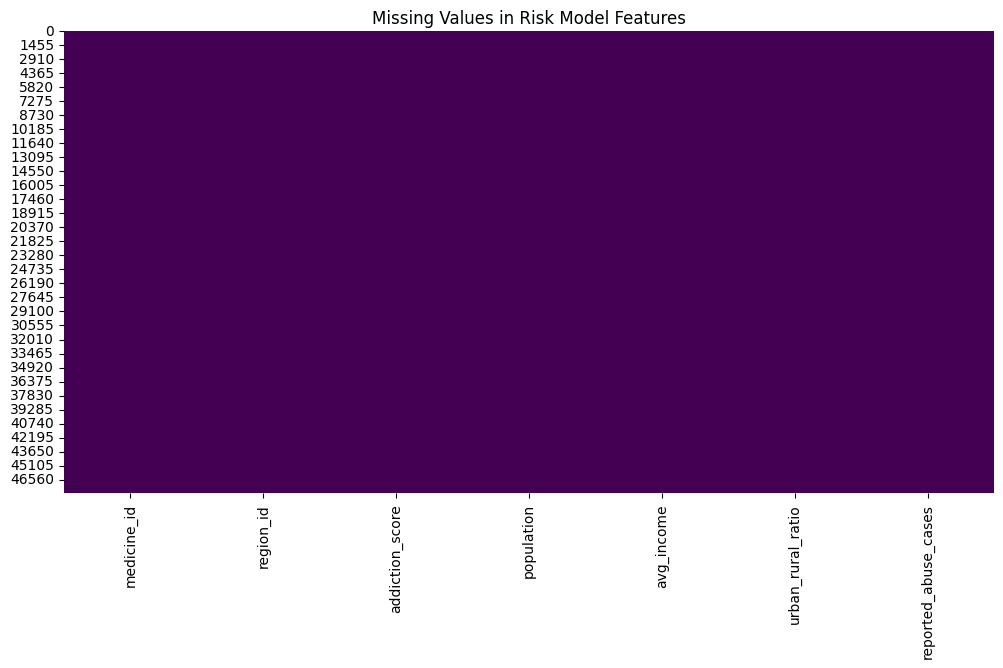

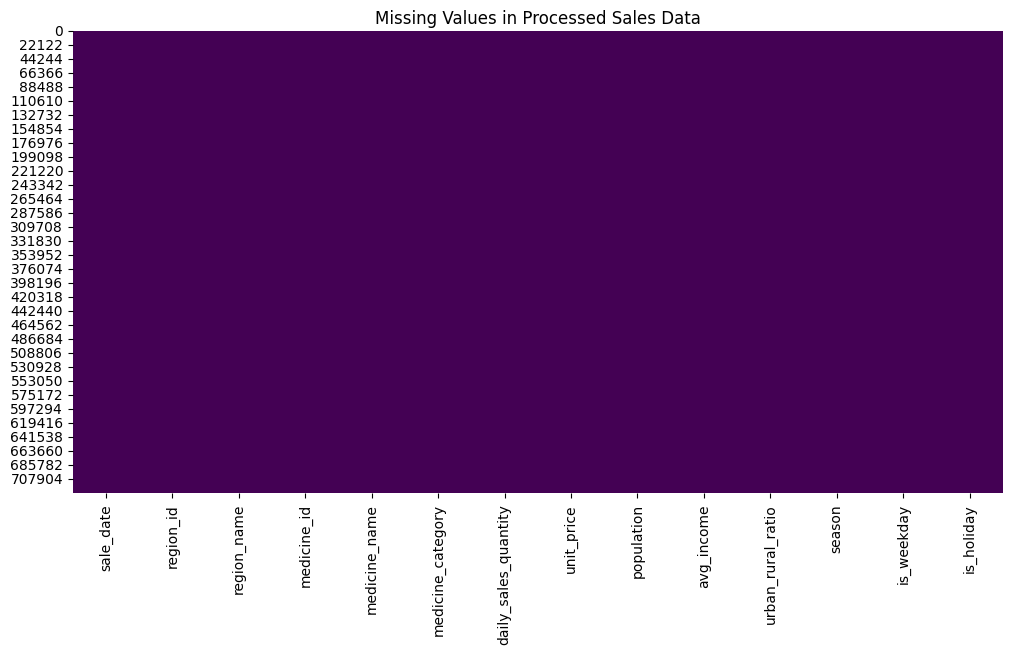

In [ ]:
# 📌 Cell 5: Missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(risk_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Risk Model Features")
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(sales_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Processed Sales Data")
plt.show()

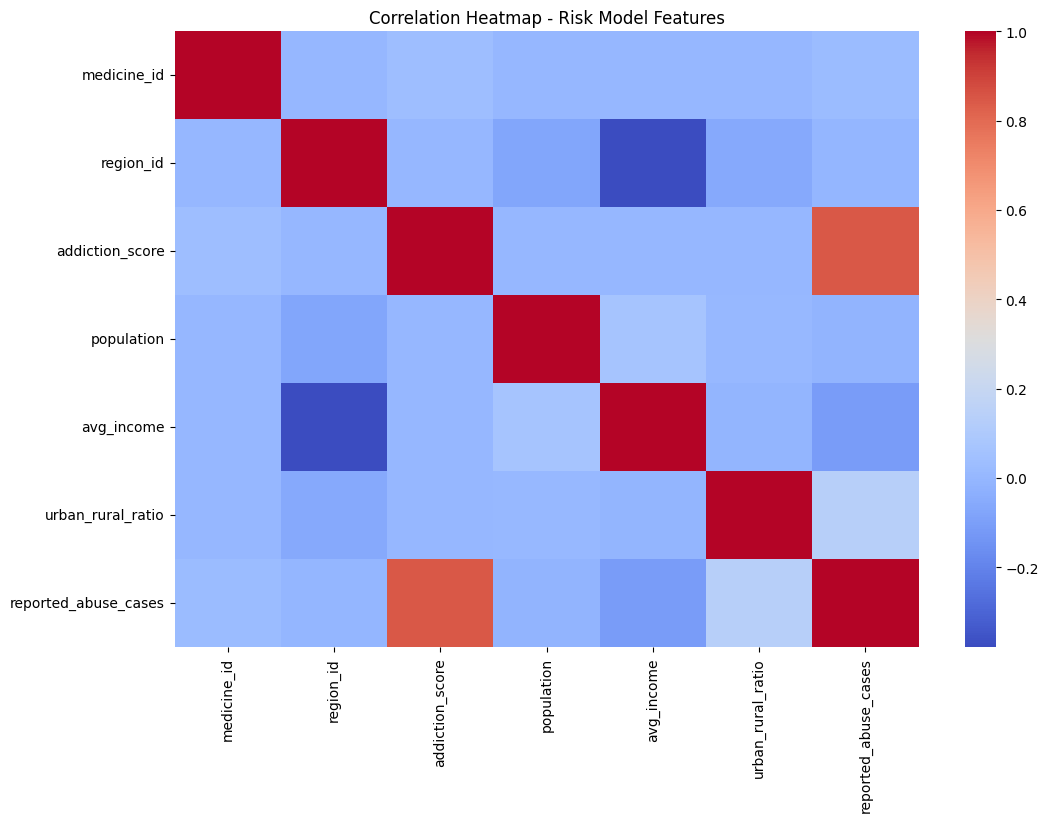

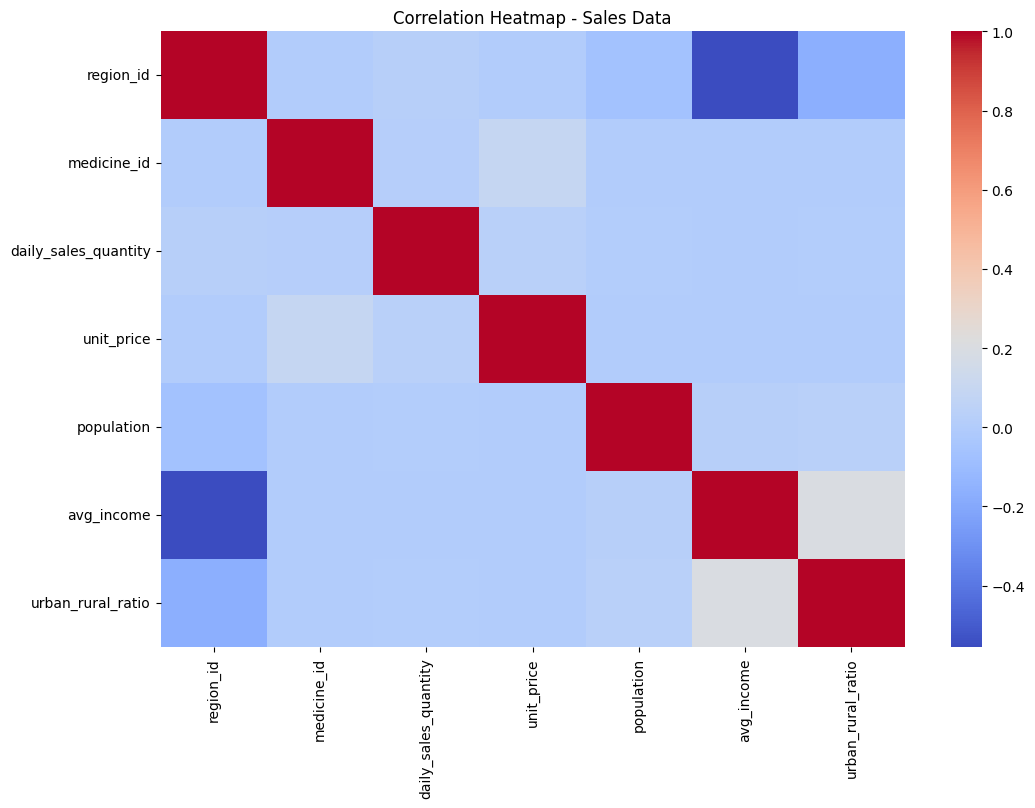

In [ ]:
# 📌 Cell 6: Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(risk_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap - Risk Model Features")
plt.show()

plt.figure(figsize=(12,8))
# Select only numeric columns for sales_df
sales_numeric_df = sales_df.select_dtypes(include=['float64','int64'])
sns.heatmap(sales_numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap - Sales Data")
plt.show()

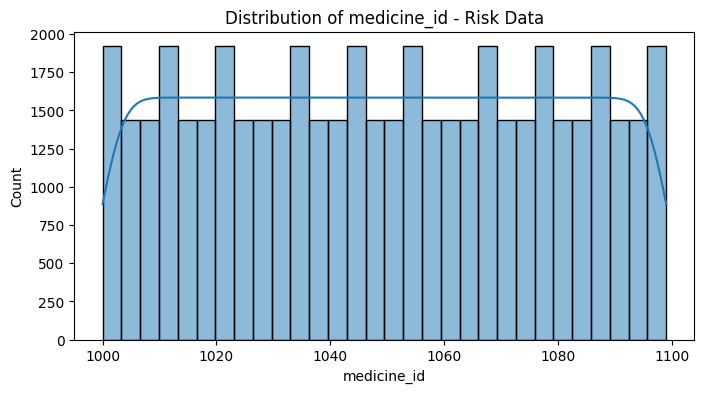

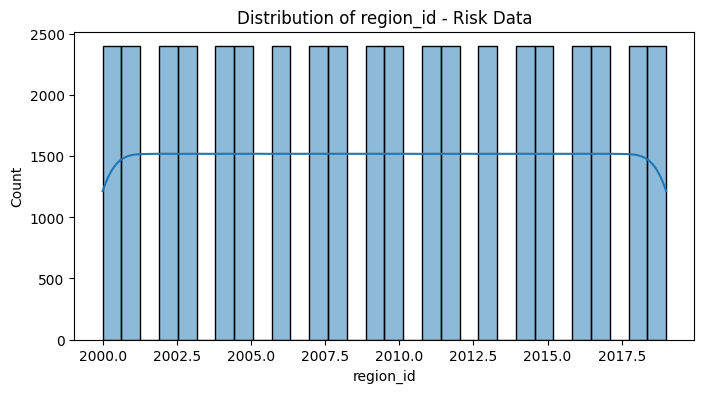

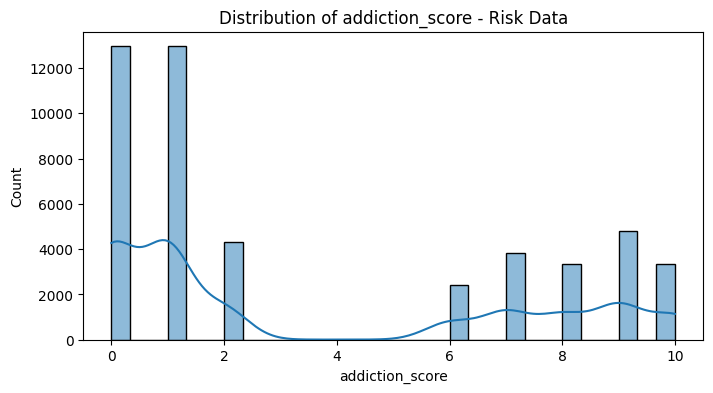

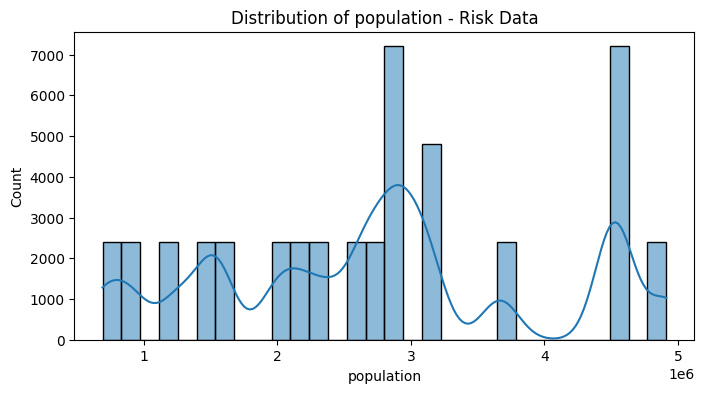

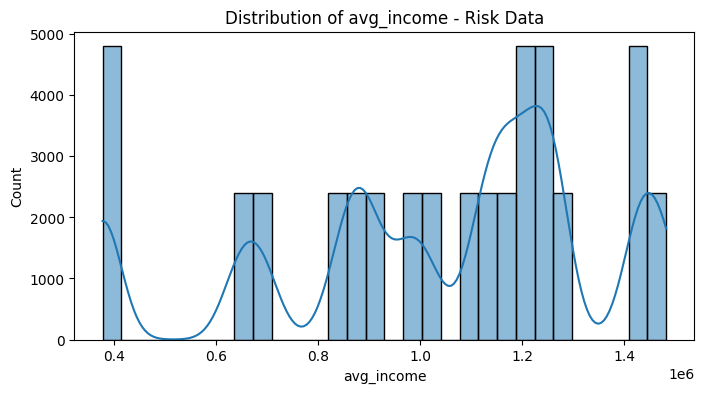

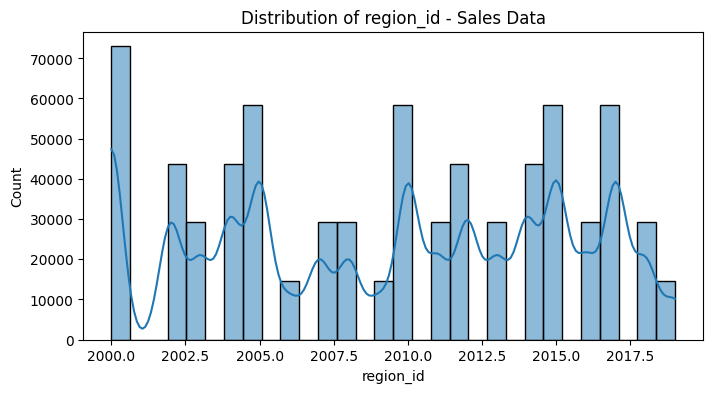

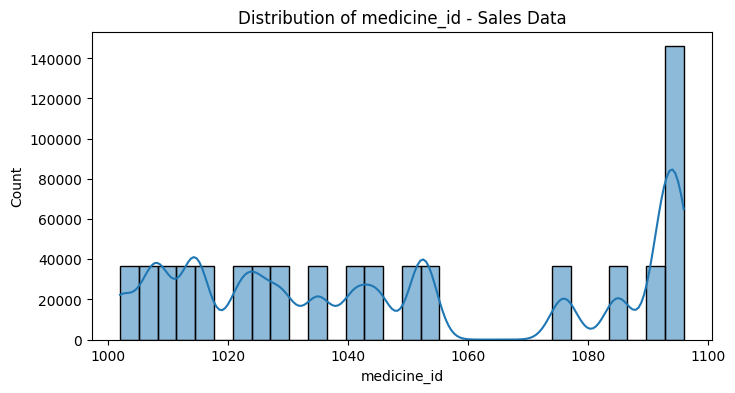

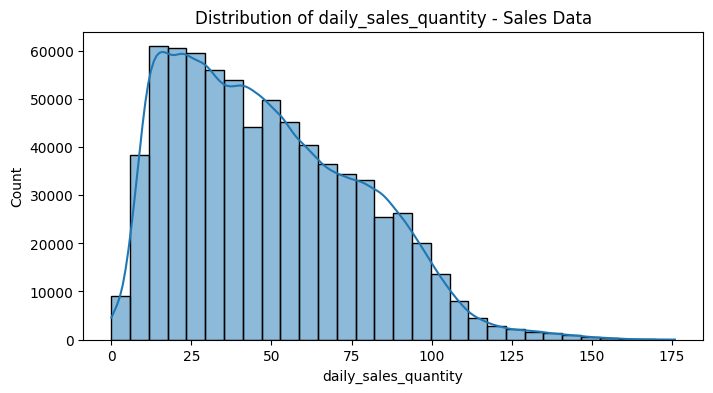

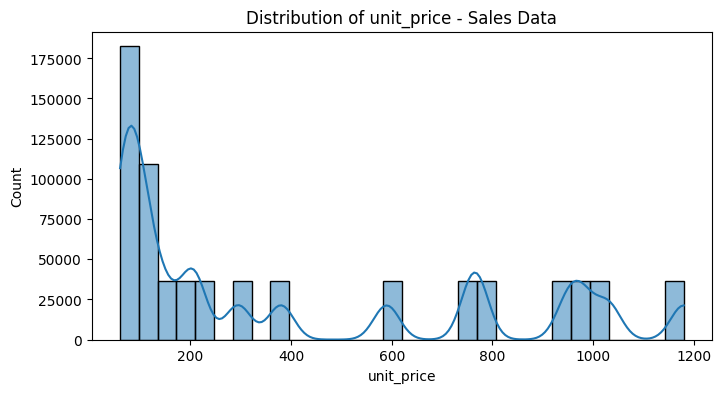

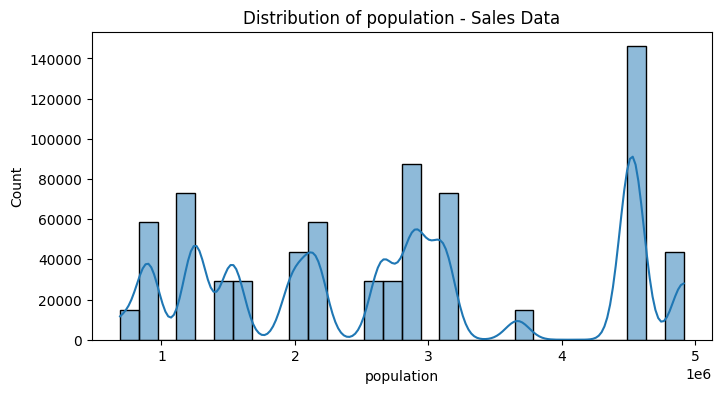

In [ ]:
# 📌 Cell 7: Distribution plots of numeric features
numeric_cols = risk_df.select_dtypes(include=['float64','int64']).columns[:5]  # first 5
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(risk_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} - Risk Data")
    plt.show()

numeric_cols_sales = sales_df.select_dtypes(include=['float64','int64']).columns[:5]
for col in numeric_cols_sales:
    plt.figure(figsize=(8,4))
    sns.histplot(sales_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} - Sales Data")
    plt.show()

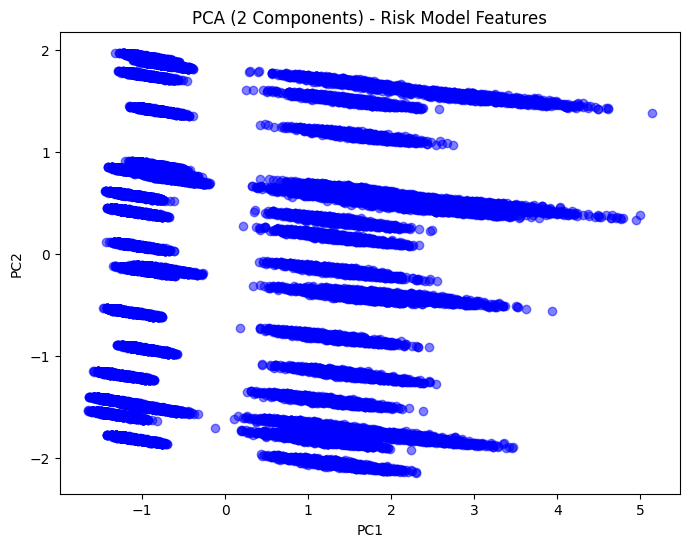

In [ ]:
# 📌 Cell 8: PCA for dimensionality reduction (Risk Data Example)
risk_numeric = risk_df.select_dtypes(include=['float64','int64']).dropna()
scaler = StandardScaler()
risk_scaled = scaler.fit_transform(risk_numeric)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(risk_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5, c='blue')
plt.title("PCA (2 Components) - Risk Model Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:


# 📌 Cell 9: Generate profiling reports
risk_report = ProfileReport(risk_df, title="Risk Model Features Report", explorative=True)
sales_report = ProfileReport(sales_df, title="Processed Sales Data Report", explorative=True)

# Save reports as HTML
risk_report.to_file("risk_model_features_report.html")
sales_report.to_file("processed_sales_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 90.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:07<00:00,  1.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]